# 필요한 부분 : 시각화, 상관계수 행렬, 선형회귀 수정

In [47]:
import bs4
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [48]:
os.listdir()

['.ipynb_checkpoints',
 'deep_fantasy_novel-master',
 'deep_fantasy_novel-master.zip',
 'diary_cjw (1).txt',
 'diary_cjw.txt',
 'laptime_regression.ipynb',
 'testcode.ipynb',
 'vehicle (국산통합완료).xlsx',
 '~$뉘르부르크링 랩타임 240_.xlsx',
 '뉘르부르크링 랩타임 240_.xlsx',
 '일기추출.docx']

#### 엑셀 불러오는 코드

In [49]:
df1 = pd.read_excel('vehicle (국산통합완료).xlsx', engine = 'openpyxl')

In [50]:
df1.tail(40)

,Unnamed: 0,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
279,280.0,1725.0,258.0,2.0,240.0,208.0,Honda S2000,519.0,25500,6.0
280,281.0,1485.0,250.0,2.3,260.0,380.0,Mazda MAZDASPEED3 (Mazda3 MPS),519.0,NaN,6.1
281,282.0,1580.0,260.0,3.8,350.0,400.0,Hyundai Genesis Coupe 3.8L,523.0,NaN,5.9
282,283.0,1295.0,235.0,2.0,200.0,280.0,Volkswagen Scirocco 2.0 TSI,527.0,NaN,5.8
283,284.0,1319.0,235.0,2.0,200.0,269.0,Honda Civic Type-R 2.0i LS,527.0,26400,5.5
284,285.0,1203.0,223.0,1.6,194.0,230.0,Opel Corsa OPC,528.0,NaN,6.8
285,286.0,1372.0,235.0,2.0,200.0,280.0,Volkswagen Golf GTI (Mk5),533.0,NaN,7.9
286,287.0,1293.0,230.0,1.6,207.0,280.0,Opel Corsa 1.6 Turbo OPC,534.0,NaN,6.8
287,288.0,2589.0,225.0,5.0,517.0,625.0,Range Rover Sport Supercharged (2010),535.0,NaN,5.9
288,NaN,1705.0,270.0,3.3,375.0,510.0,G70 3.3 터보가솔린,NaN,4800만,4.7


#### index 번호 0 ~ 287 까지는 학습데이터, 288 ~ 318 까지는 예측용 데이터이므로
#### 당장 학습을 하는데 필요한 부분인 학습데이터를 별도의 데이터로 분리

In [51]:
df = df1.iloc[0:288]
df

,Unnamed: 0,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
0,1.0,1626.0,325.0,4.0,730.0,800.0,AMG GT Black Series,403.62,337800,3.1
1,2.0,1525.0,354.0,6.5,770.0,720.0,Lamborghini Aventador SVJ,404.97,432300,2.8
2,3.0,650.0,290.0,2.8,455.0,380.0,Radical SR8LM,408.00,NaN,3.3
3,4.0,1526.0,328.0,5.2,640.0,600.0,Lamborghini Huracán Performante,412.01,NaN,2.8
4,5.0,650.0,270.0,2.6,363.0,271.0,Radical SR8,415.00,NaN,2.7
...,...,...,...,...,...,...,...,...,...,...
283,284.0,1319.0,235.0,2.0,200.0,269.0,Honda Civic Type-R 2.0i LS,527.00,26400,5.5
284,285.0,1203.0,223.0,1.6,194.0,230.0,Opel Corsa OPC,528.00,NaN,6.8
285,286.0,1372.0,235.0,2.0,200.0,280.0,Volkswagen Golf GTI (Mk5),533.00,NaN,7.9
286,287.0,1293.0,230.0,1.6,207.0,280.0,Opel Corsa 1.6 Turbo OPC,534.00,NaN,6.8


#### 필요없는 칼럼 삭제 (첫번째 열 Unnamed: 0 부분)

In [52]:
df = df.drop("Unnamed: 0", axis = 1)
df

,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
0,1626.0,325.0,4.0,730.0,800.0,AMG GT Black Series,403.62,337800,3.1
1,1525.0,354.0,6.5,770.0,720.0,Lamborghini Aventador SVJ,404.97,432300,2.8
2,650.0,290.0,2.8,455.0,380.0,Radical SR8LM,408.00,NaN,3.3
3,1526.0,328.0,5.2,640.0,600.0,Lamborghini Huracán Performante,412.01,NaN,2.8
4,650.0,270.0,2.6,363.0,271.0,Radical SR8,415.00,NaN,2.7
...,...,...,...,...,...,...,...,...,...
283,1319.0,235.0,2.0,200.0,269.0,Honda Civic Type-R 2.0i LS,527.00,26400,5.5
284,1203.0,223.0,1.6,194.0,230.0,Opel Corsa OPC,528.00,NaN,6.8
285,1372.0,235.0,2.0,200.0,280.0,Volkswagen Golf GTI (Mk5),533.00,NaN,7.9
286,1293.0,230.0,1.6,207.0,280.0,Opel Corsa 1.6 Turbo OPC,534.00,NaN,6.8


# 시각화

#### 학습데이터에서 반응변수는 lap time 이므로
#### 자동차의 각 인자별로 lap time에 어떤 영향을 미치는지 알아보기
#### 정확히는 상관관계가 있는지를 우선 확인하는데 이를 위해 scatter plot 사용

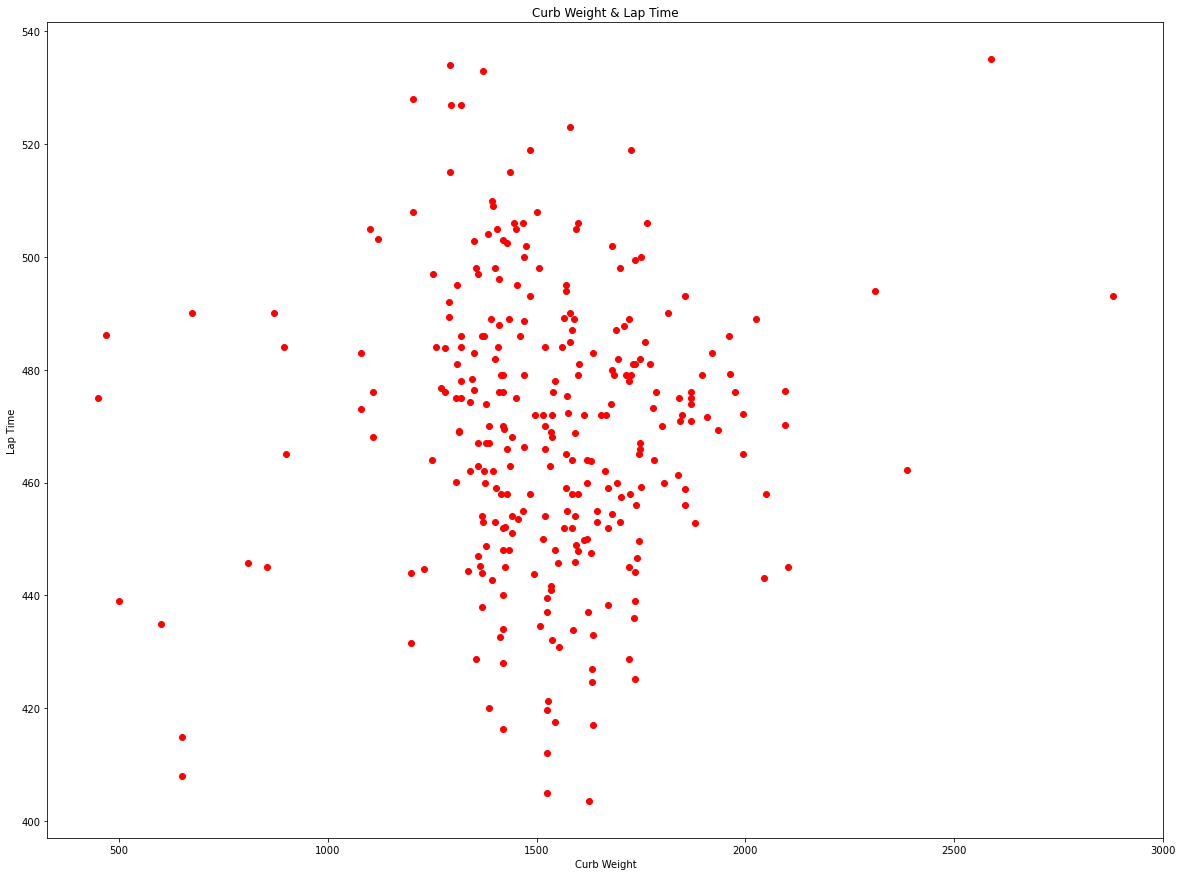

In [53]:
# 차량 무게와 랩 타임의 관계

# scatter plot 그림 크기 지정
plt.figure(figsize = (20, 15))

# scatter plot의 X축에 본 데이터의'Curb Weight' 성분, Y축에 laptime 입력
plt.scatter(df['CurbWeight'], df['laptime'], c = 'red')

#제목
plt.title("Curb Weight & Lap Time")
# X축 이름
plt.xlabel("Curb Weight")
# Y축 이름
plt.ylabel("Lap Time")
plt.show()

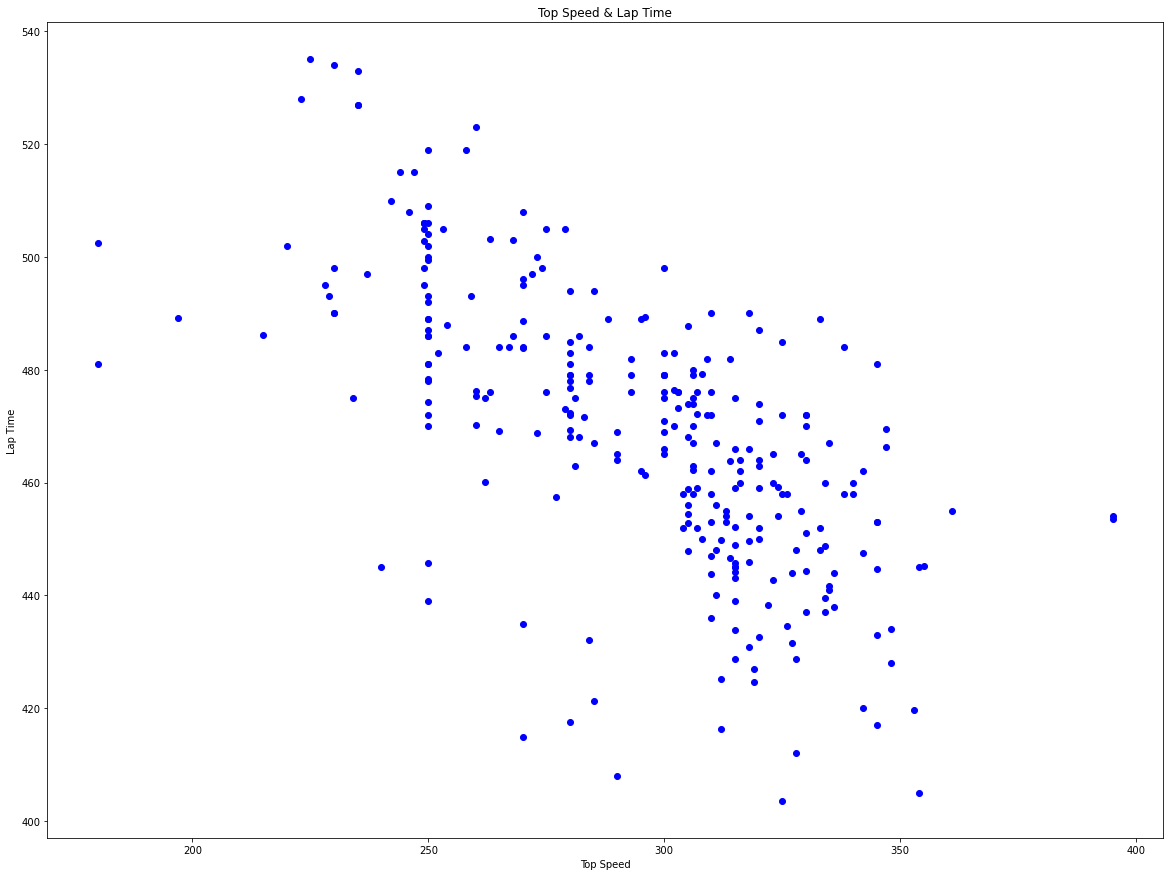

In [54]:
# 최고 속도와 랩 타임의 관계

plt.figure(figsize = (20, 15))

# scatter plot의 X축에 본 데이터의'Top Speed' 성분, Y축에 laptime 입력
plt.scatter(df['TopSpeed'], df['laptime'], c = 'blue')

plt.title("Top Speed & Lap Time")
plt.xlabel("Top Speed")
plt.ylabel("Lap Time")
plt.show()

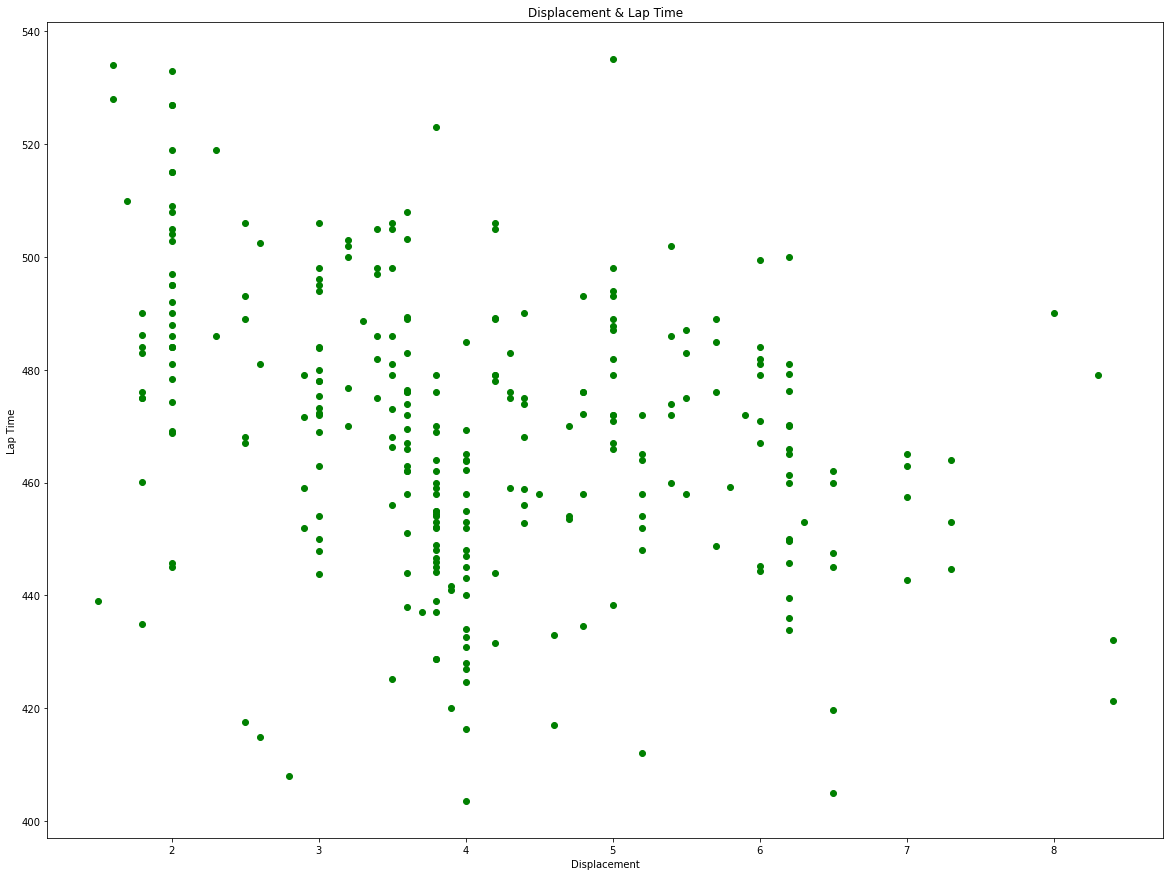

In [55]:
# 배기량와 랩 타임의 관계
plt.figure(figsize = (20, 15))

# scatter plot의 X축에 본 데이터의'Displacement' 성분, Y축에 laptime 입력
plt.scatter(df['Displacement'], df['laptime'], c = 'green')

plt.title("Displacement & Lap Time")
plt.xlabel("Displacement")
plt.ylabel("Lap Time")
plt.show()

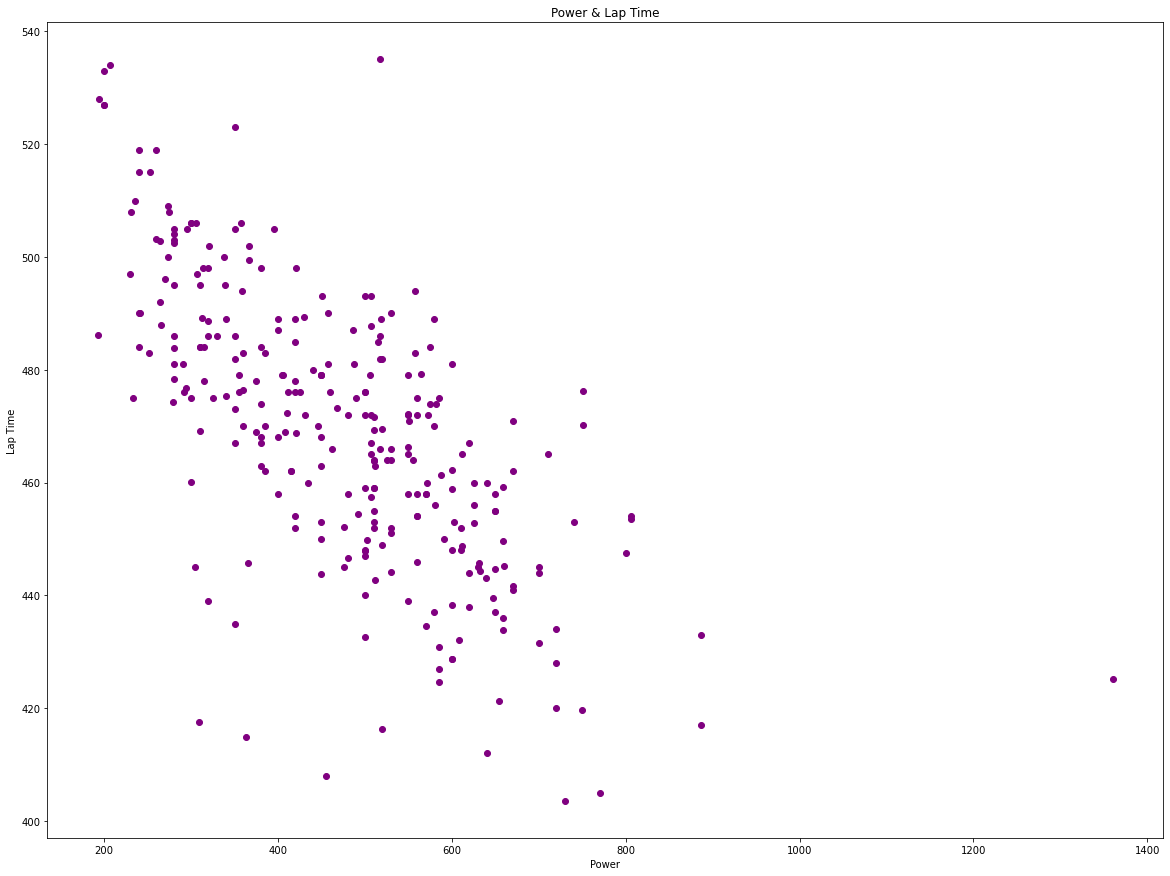

In [56]:
# 마력과 랩 타임의 관계
plt.figure(figsize = (20, 15))

# scatter plot의 X축에 본 데이터의'Power' 성분, Y축에 laptime 입력
plt.scatter(df['Power'], df['laptime'], c = 'purple')

plt.title("Power & Lap Time")
plt.xlabel("Power")
plt.ylabel("Lap Time")
plt.show()

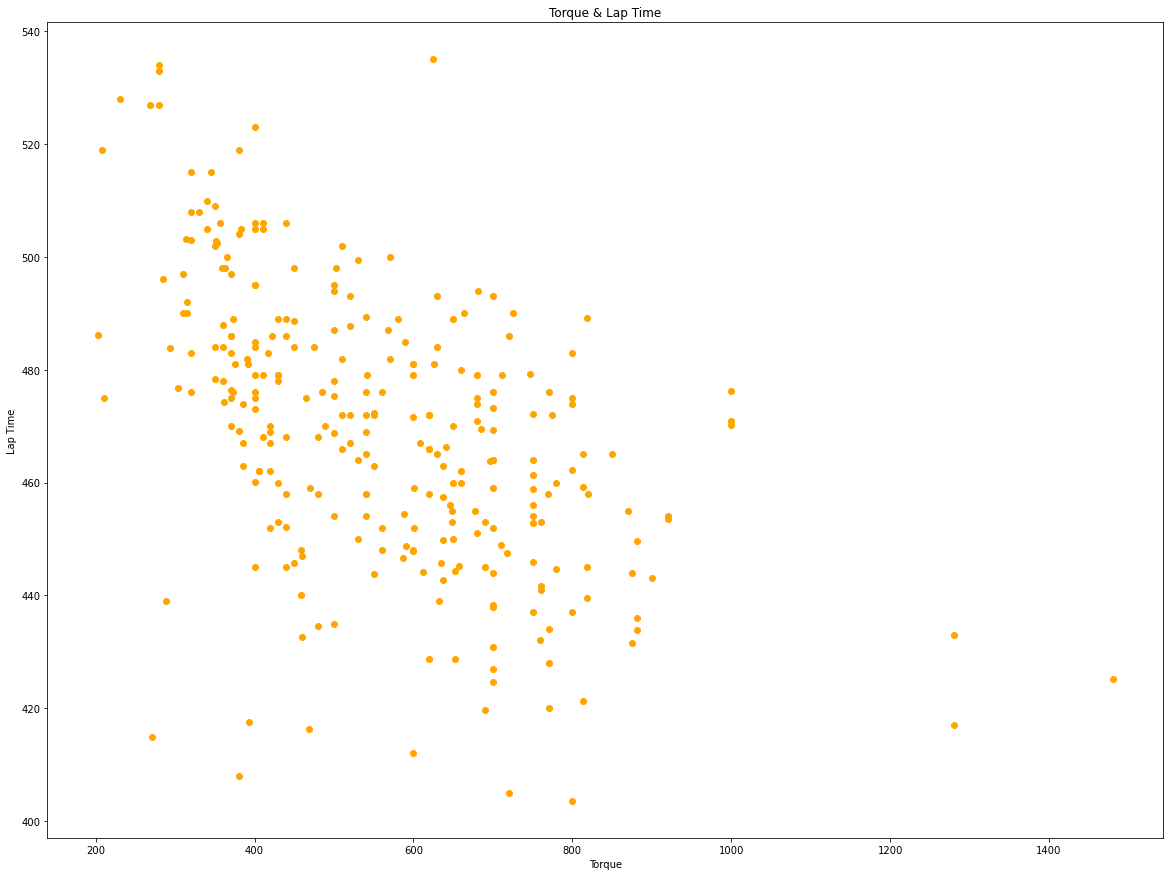

In [57]:
# 토크와 랩 타임의 관계
plt.figure(figsize = (20, 15))

# scatter plot의 X축에 본 데이터의'Torque' 성분, Y축에 laptime 입력
plt.scatter(df['Torque'], df['laptime'], c = 'orange')

plt.title("Torque & Lap Time")
plt.xlabel("Torque")
plt.ylabel("Lap Time")
plt.show()

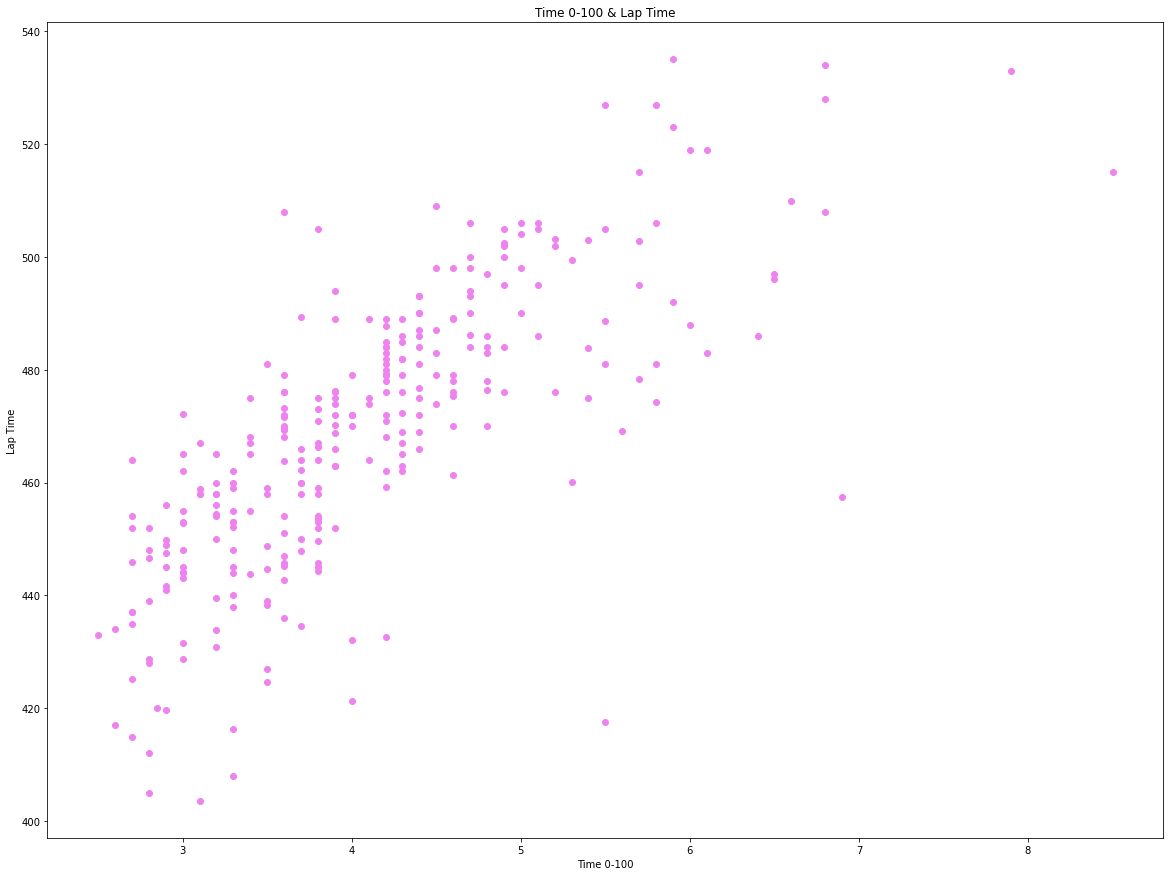

In [58]:
# 제로백과 랩 타임의 관계
plt.figure(figsize = (20, 15))

# scatter plot의 X축에 본 데이터의'제로백' 성분, Y축에 laptime 입력
plt.scatter(df['Zero'], df['laptime'], c = 'violet')

plt.title("Time 0-100 & Lap Time")
plt.xlabel("Time 0-100")
plt.ylabel("Lap Time")
plt.show()

# 상관계수 행렬

#### 각 요소별로 서로 얼만큼의 상관관계가 있는지 표로 확인
#### corr의 값이 1에 가까울수록 서로 비례하는 경향이 뚜렷하다는 표시
#### corr의 값이 0에 가까울수록 서로 아무 상관이 없다는 표시
#### corr의 값이 -1에 가까울수록 서로 반대되는 경향이 뚜렷 (한쪽이 증가하면 나머지 한쪽은 감소)

In [59]:
np.round(df.corr(),2)

,CurbWeight,TopSpeed,Displacement,Power,Torque,laptime,Zero
CurbWeight,1.00,0.19,0.44,0.43,0.52,0.04,-0.11
TopSpeed,0.19,1.00,0.52,0.75,0.59,-0.66,-0.70
Displacement,0.44,0.52,1.00,0.63,0.58,-0.31,-0.36
Power,0.43,0.75,0.63,1.00,0.89,-0.67,-0.70
Torque,0.52,0.59,0.58,0.89,1.00,-0.53,-0.59
laptime,0.04,-0.66,-0.31,-0.67,-0.53,1.00,0.75
Zero,-0.11,-0.70,-0.36,-0.70,-0.59,0.75,1.00


In [60]:
import seaborn as sns

#### 위와 동일한 내용을 그림으로 시각화
#### 빨간색이 짙을수록 비례
#### 파란색이 짙을수록 (-)의 비례
#### 색이 흰색에 가까울수록 서로 상관이 없음

#### laptime과 얽힌 인자의 색상이 진할수록 laptime에 영향을 크게 줄 가능성이 높음

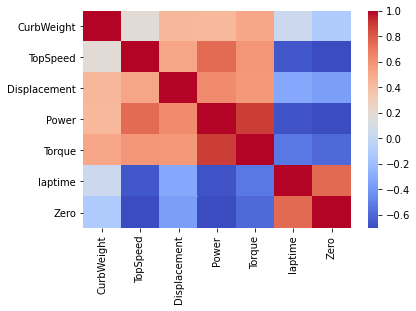

In [61]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

# 군집화 (국산 차량 정보를 입력하고 비슷한 유형의 레이싱카를 보여주려는 용도가 아니면 딱히 필요가 없는 정보임. Skip하고 선형회귀로 넘어가도 됨)

### k-means 군집화

#### 배운것을 활용하는 목적(?)에서 조사한 차량들의 종류를 군집화하여 분류

In [62]:
from sklearn.cluster import KMeans

In [63]:
df

,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
0,1626.0,325.0,4.0,730.0,800.0,AMG GT Black Series,403.62,337800,3.1
1,1525.0,354.0,6.5,770.0,720.0,Lamborghini Aventador SVJ,404.97,432300,2.8
2,650.0,290.0,2.8,455.0,380.0,Radical SR8LM,408.00,NaN,3.3
3,1526.0,328.0,5.2,640.0,600.0,Lamborghini Huracán Performante,412.01,NaN,2.8
4,650.0,270.0,2.6,363.0,271.0,Radical SR8,415.00,NaN,2.7
...,...,...,...,...,...,...,...,...,...
283,1319.0,235.0,2.0,200.0,269.0,Honda Civic Type-R 2.0i LS,527.00,26400,5.5
284,1203.0,223.0,1.6,194.0,230.0,Opel Corsa OPC,528.00,NaN,6.8
285,1372.0,235.0,2.0,200.0,280.0,Volkswagen Golf GTI (Mk5),533.00,NaN,7.9
286,1293.0,230.0,1.6,207.0,280.0,Opel Corsa 1.6 Turbo OPC,534.00,NaN,6.8


#### 군집화하는데 필요없는 인자 삭제
#### 차량 이름은 군집대상이 아니므로 삭제
#### laptime은 차량 특성이 아니므로 삭제
#### 차량 가격도 기계적 특성이 아니므로 삭제

In [64]:
X = df.drop(columns = 'vehicle')
X = X.drop(columns = 'laptime')
X = X.drop(columns = 'Price')
X

,CurbWeight,TopSpeed,Displacement,Power,Torque,Zero
0,1626.0,325.0,4.0,730.0,800.0,3.1
1,1525.0,354.0,6.5,770.0,720.0,2.8
2,650.0,290.0,2.8,455.0,380.0,3.3
3,1526.0,328.0,5.2,640.0,600.0,2.8
4,650.0,270.0,2.6,363.0,271.0,2.7
...,...,...,...,...,...,...
283,1319.0,235.0,2.0,200.0,269.0,5.5
284,1203.0,223.0,1.6,194.0,230.0,6.8
285,1372.0,235.0,2.0,200.0,280.0,7.9
286,1293.0,230.0,1.6,207.0,280.0,6.8


#### 당장 필요한건 아니지만 나중에 쓰기 위해 칼럼 항목 따로 저장
#### 위의 CurbWeight ~ Zero 까지

In [65]:
header_x = X.columns
header_x

Index(['CurbWeight', 'TopSpeed', 'Displacement', 'Power', 'Torque', 'Zero'], dtype='object')

In [66]:
Y = df.laptime
Y

0      403.62
1      404.97
2      408.00
3      412.01
4      415.00
        ...  
283    527.00
284    528.00
285    533.00
286    534.00
287    535.00
Name: laptime, Length: 288, dtype: float64

In [67]:
# 적정 군집 갯수 확인하기 (수업 파일에 있던 예제)
# 각 군집별로 개별 데이터와 중심점간의 분산 (거리 제곱값) 구하기

# 입력 인자로 1)데이터와 2)중심점 좌표, 3)군집 레이블 을 받아옴
def total_internal_ss(X, centers, clusters):
    # 클러스터(군집) 번호별로 for 루프를 돌면서 
    dist_var = 0
    num_cluster = 0
    for i in centers: # 몇번째 군집의 중심점을 선택할지
        loc_data = 0
        for x in clusters: # 각 군집 내의 데이터들 (군집번호)
            if x == num_cluster: # 데이터의 군집 번호가 현재 루프를 돌고 있는 군집의 군집번호와 일치할 경우
                dist_var += (i - X[loc_data])**2 # 산포 계산. 해당 군집의 센터점과의 분산
            loc_data += 1 # 로케이션 번호 증가
        num_cluster += 1 # 루프를 돌고나면 그 다음 군집으로 넘어감
    return sum(dist_var) # 최종 분산값 반환

In [68]:
# a : X(자동차 인자의 수치정보가 저장된 데이터)를 리스트로 변환
# b : a를 numpy의 array로 변환
a = list(list(X.loc[i]) for i in range(len(X.index)))
b = np.array(a)
b

array([[1.626e+03, 3.250e+02, 4.000e+00, 7.300e+02, 8.000e+02, 3.100e+00],
       [1.525e+03, 3.540e+02, 6.500e+00, 7.700e+02, 7.200e+02, 2.800e+00],
       [6.500e+02, 2.900e+02, 2.800e+00, 4.550e+02, 3.800e+02, 3.300e+00],
       ...,
       [1.372e+03, 2.350e+02, 2.000e+00, 2.000e+02, 2.800e+02, 7.900e+00],
       [1.293e+03, 2.300e+02, 1.600e+00, 2.070e+02, 2.800e+02, 6.800e+00],
       [2.589e+03, 2.250e+02, 5.000e+00, 5.170e+02, 6.250e+02, 5.900e+00]])

#### 적절한 군집의 갯수를 확인해야 함
#### 작동 방식은 임의의 갯수의 군집으로 테스트를 돌려보고 해당 군집 갯수의 분산 확인
#### 그래프를 그렸을 떄 그래프가 꺾이기 시작하는 구간의 군집을 선정

In [69]:
# 테스트 돌려볼 군집 갯수가 저장된 
num_cluster = [2,3,4,5,6,7,8,9,10]
TIS_array = []

# 리스트에 저장된 숫자대로 군집 설정
for i in num_cluster:
    #해당 숫자로 K Means 군집화를 돌림
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(b)
    # 앞서 정의한 함수에 데이터와 중심점, 군집 라벨 입력
    # 반환된 값 (분산)을 'a'에 저장
    a = total_internal_ss(b, kmeans.cluster_centers_, kmeans.labels_)
    # 리스트에 분산값 저장
    TIS_array.append(a)

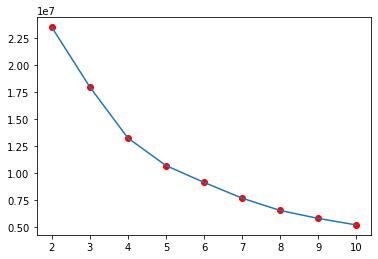

In [70]:
# 분산값이 저장된 어레이를 그래프로 그리기
# 확인결과 최적 군집 갯수는 4개로 확인
plt.scatter(num_cluster, TIS_array, color = 'red')
plt.plot(num_cluster, TIS_array)
plt.show()

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

In [72]:
X

,CurbWeight,TopSpeed,Displacement,Power,Torque,Zero
0,1626.0,325.0,4.0,730.0,800.0,3.1
1,1525.0,354.0,6.5,770.0,720.0,2.8
2,650.0,290.0,2.8,455.0,380.0,3.3
3,1526.0,328.0,5.2,640.0,600.0,2.8
4,650.0,270.0,2.6,363.0,271.0,2.7
...,...,...,...,...,...,...
283,1319.0,235.0,2.0,200.0,269.0,5.5
284,1203.0,223.0,1.6,194.0,230.0,6.8
285,1372.0,235.0,2.0,200.0,280.0,7.9
286,1293.0,230.0,1.6,207.0,280.0,6.8


In [73]:
# 앞서 확인된 최적 군집갯수 4개로 지정해서 k means 군집화

kmeans = KMeans(n_clusters=4, random_state=123)         # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X)                                           # Unsupervised learning => Only X.
res = pd.Series(kmeans.labels_)                         # Cluster labeling result as Series.

In [74]:
center = kmeans.cluster_centers_
center

array([[1390.9266055 ,  273.8440367 ,    3.07798165,  342.57798165,
         393.50458716,    4.81651376],
       [1954.97368421,  299.84210526,    4.93684211,  625.13157895,
         813.73684211,    3.74210526],
       [1585.19379845,  313.46511628,    4.79689922,  551.41860465,
         642.29457364,    3.64612403],
       [ 693.83333333,  255.        ,    2.40833333,  334.5       ,
         374.25      ,    3.70833333]])

#### 자동차의 각 인자별로 laptime과 비교해서 군집화

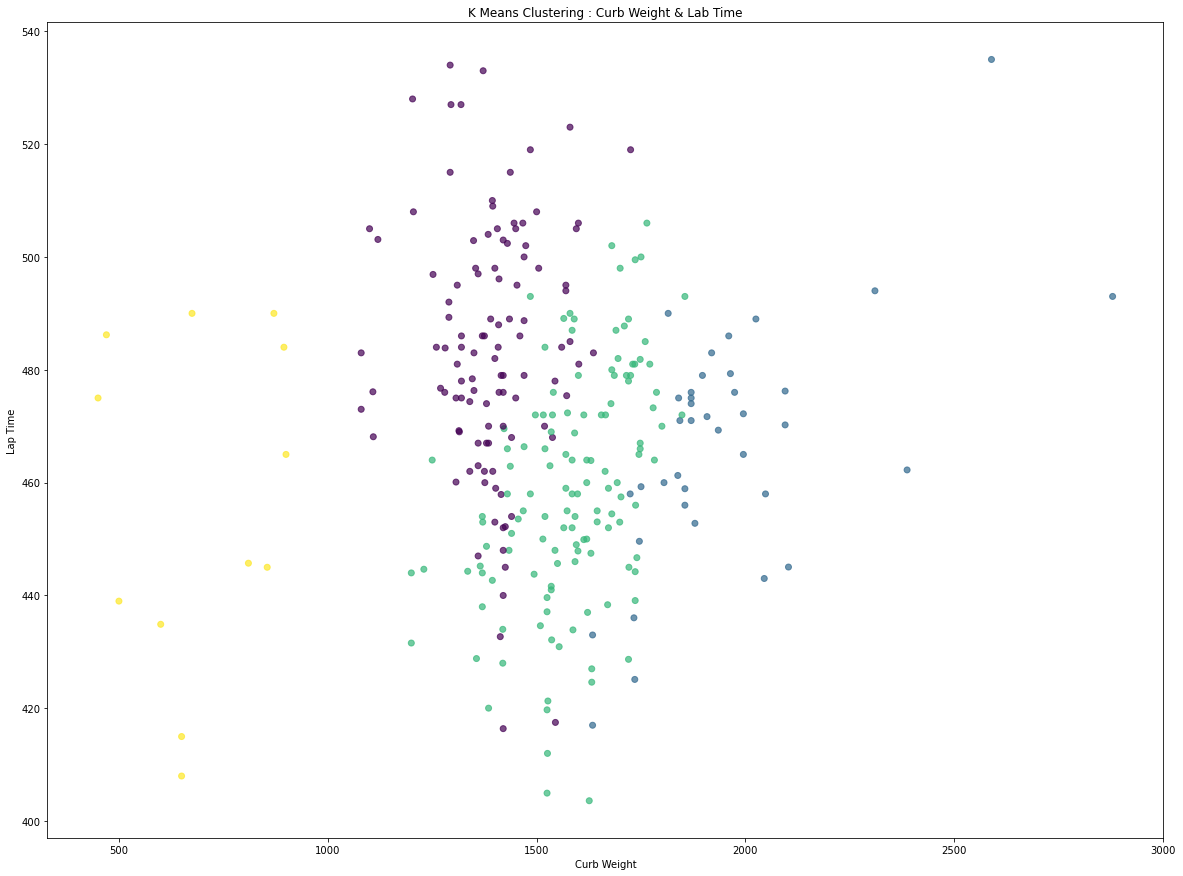

In [75]:
plt.figure(figsize = (20, 15))
plt.scatter(X.CurbWeight, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Curb Weight & Lab Time')
plt.xlabel("Curb Weight")
plt.ylabel("Lap Time")
plt.show()

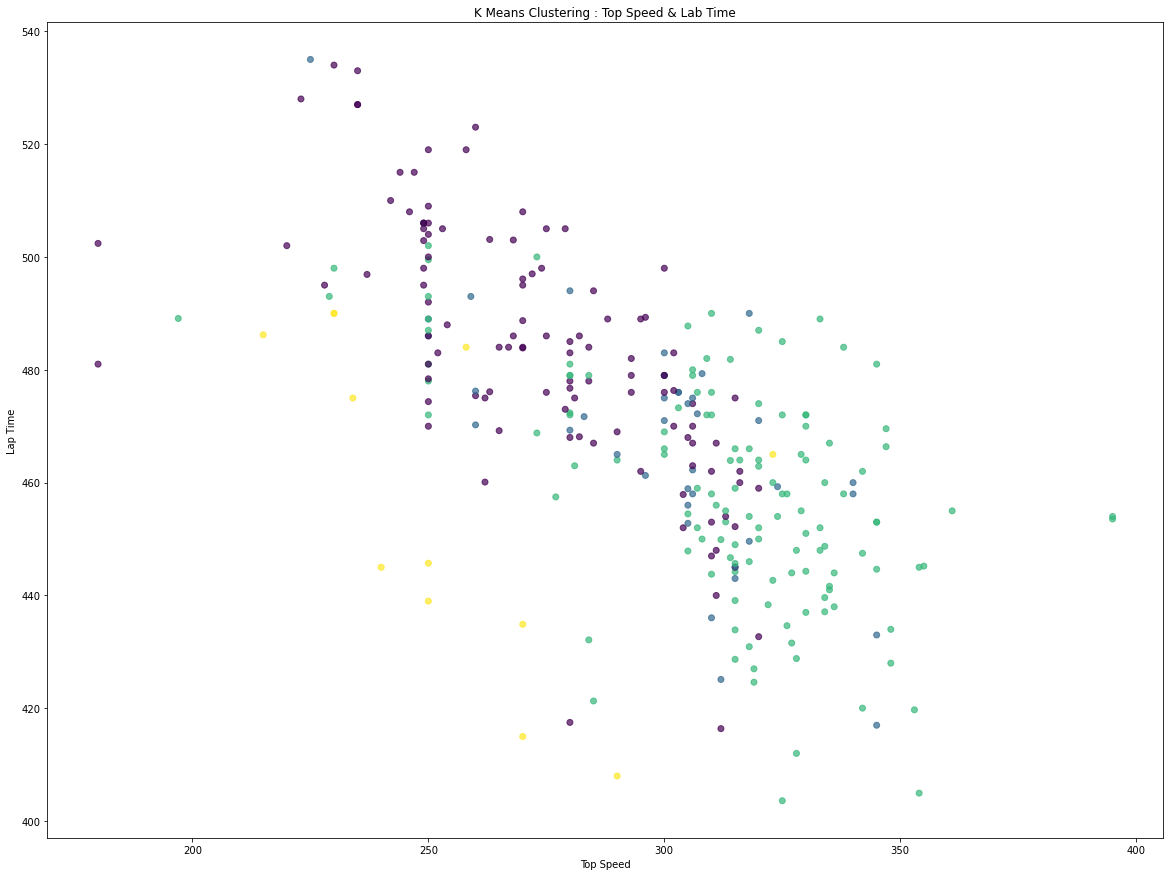

In [76]:
plt.figure(figsize = (20, 15))
plt.scatter(X.TopSpeed, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Top Speed & Lab Time')
plt.xlabel("Top Speed")
plt.ylabel("Lap Time")
plt.show()

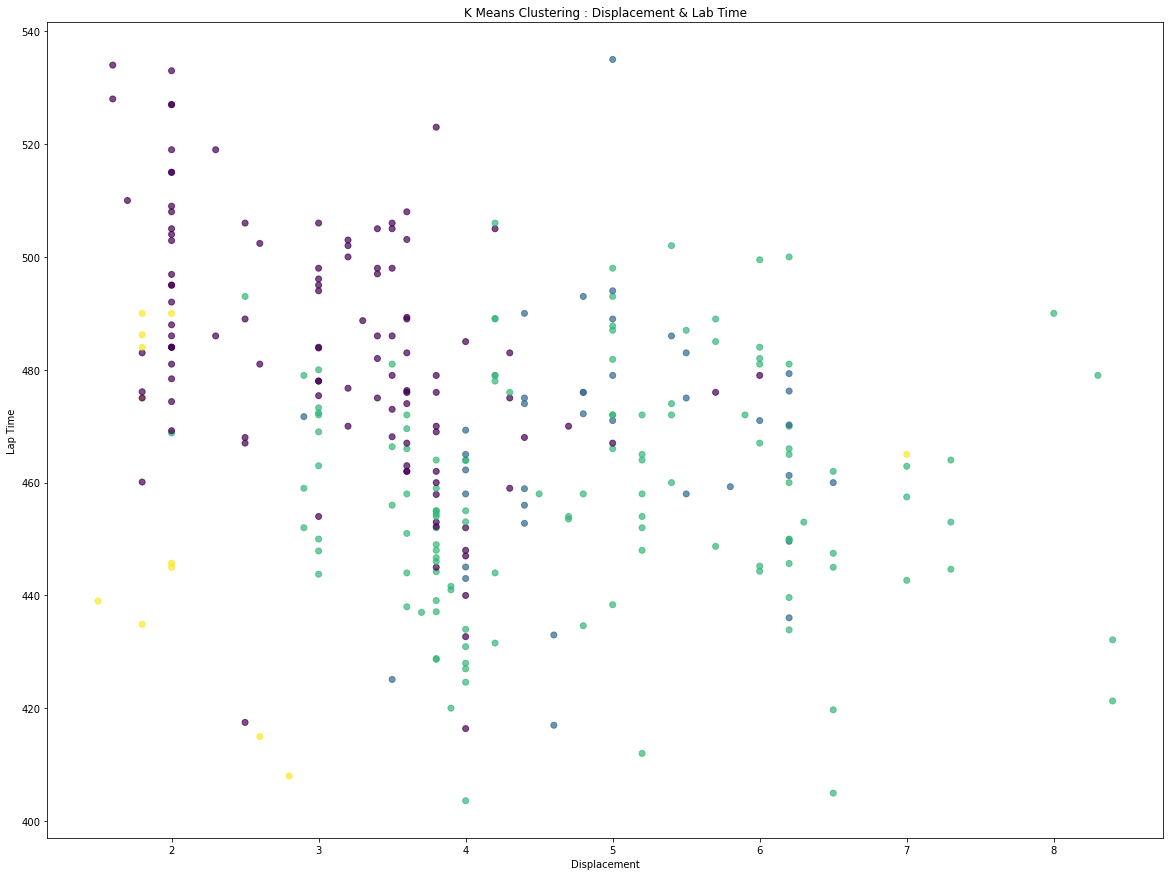

In [77]:
plt.figure(figsize = (20, 15))
plt.scatter(X.Displacement, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Displacement & Lab Time')
plt.xlabel("Displacement")
plt.ylabel("Lap Time")
plt.show()

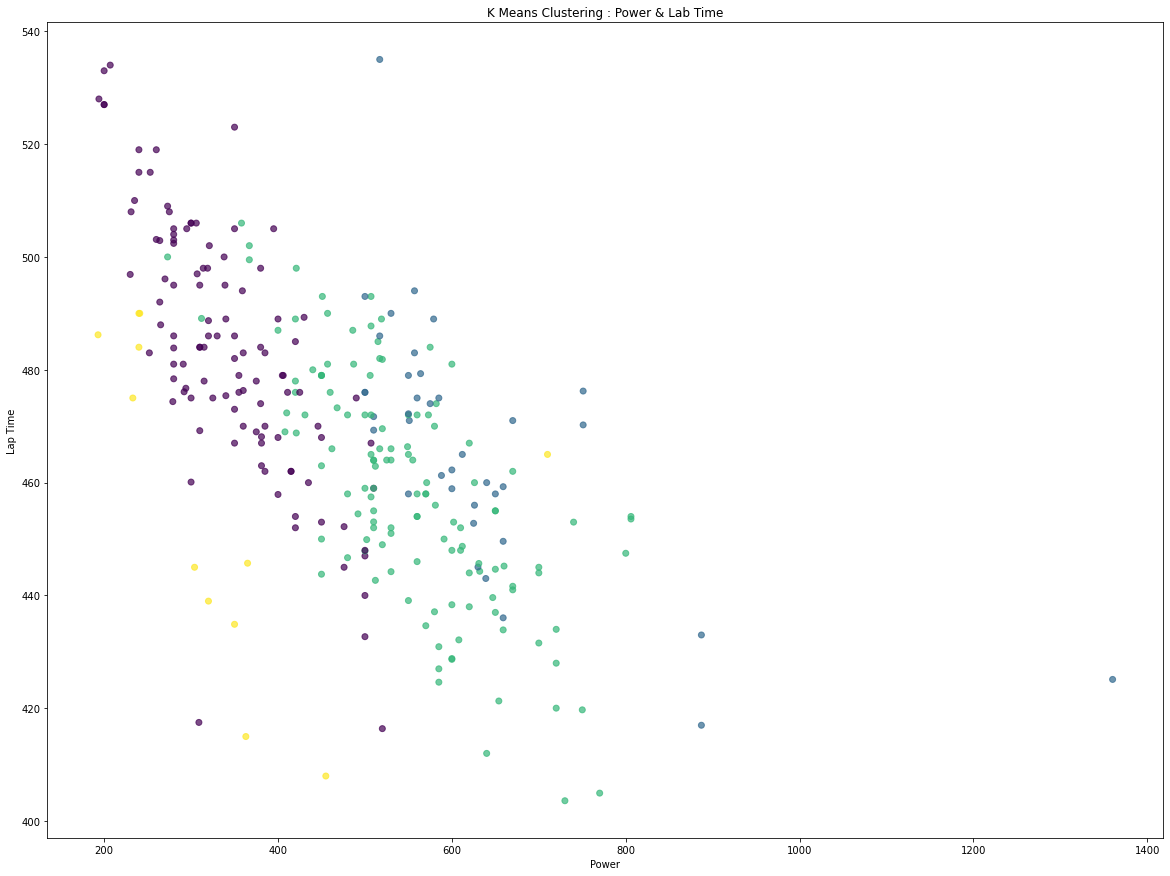

In [78]:
plt.figure(figsize = (20, 15))
plt.scatter(X.Power, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Power & Lab Time')
plt.xlabel("Power")
plt.ylabel("Lap Time")
plt.show()

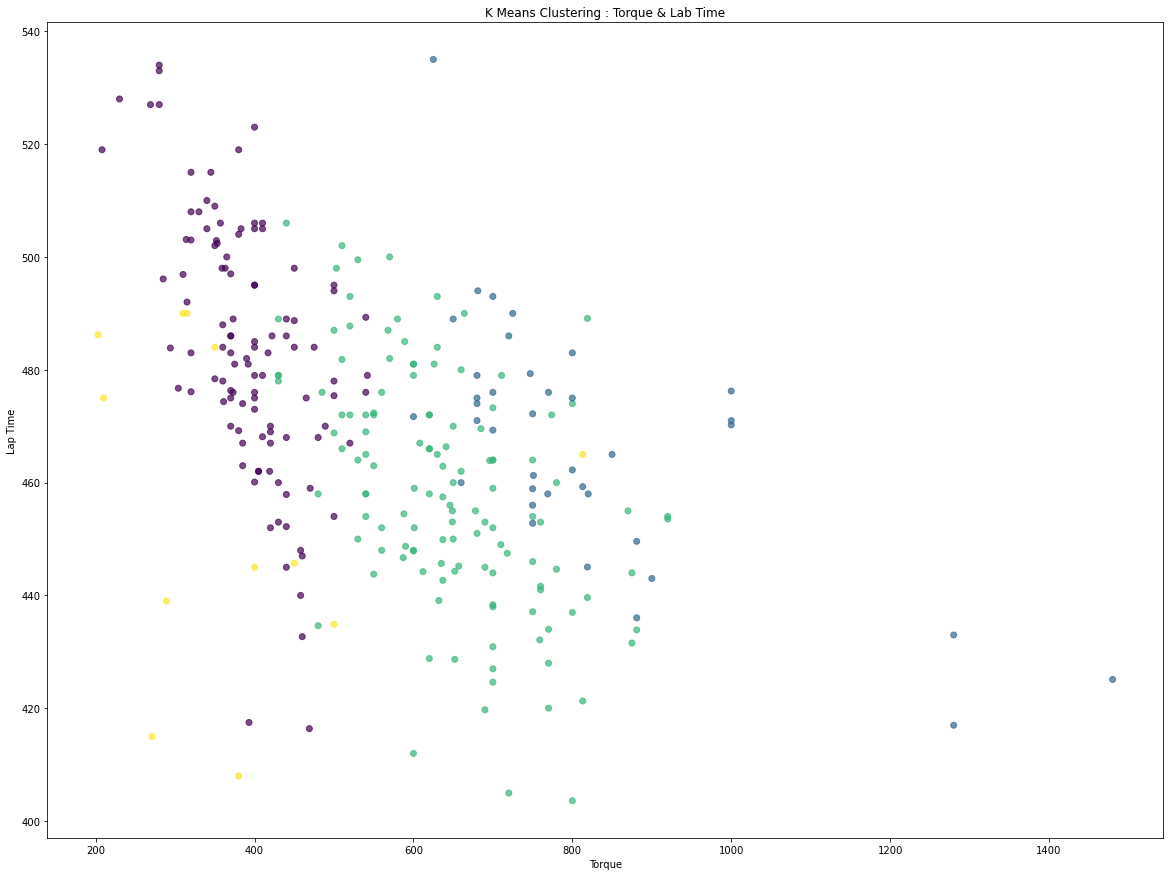

In [79]:
plt.figure(figsize = (20, 15))
plt.scatter(X.Torque, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Torque & Lab Time')
plt.xlabel("Torque")
plt.ylabel("Lap Time")
plt.show()

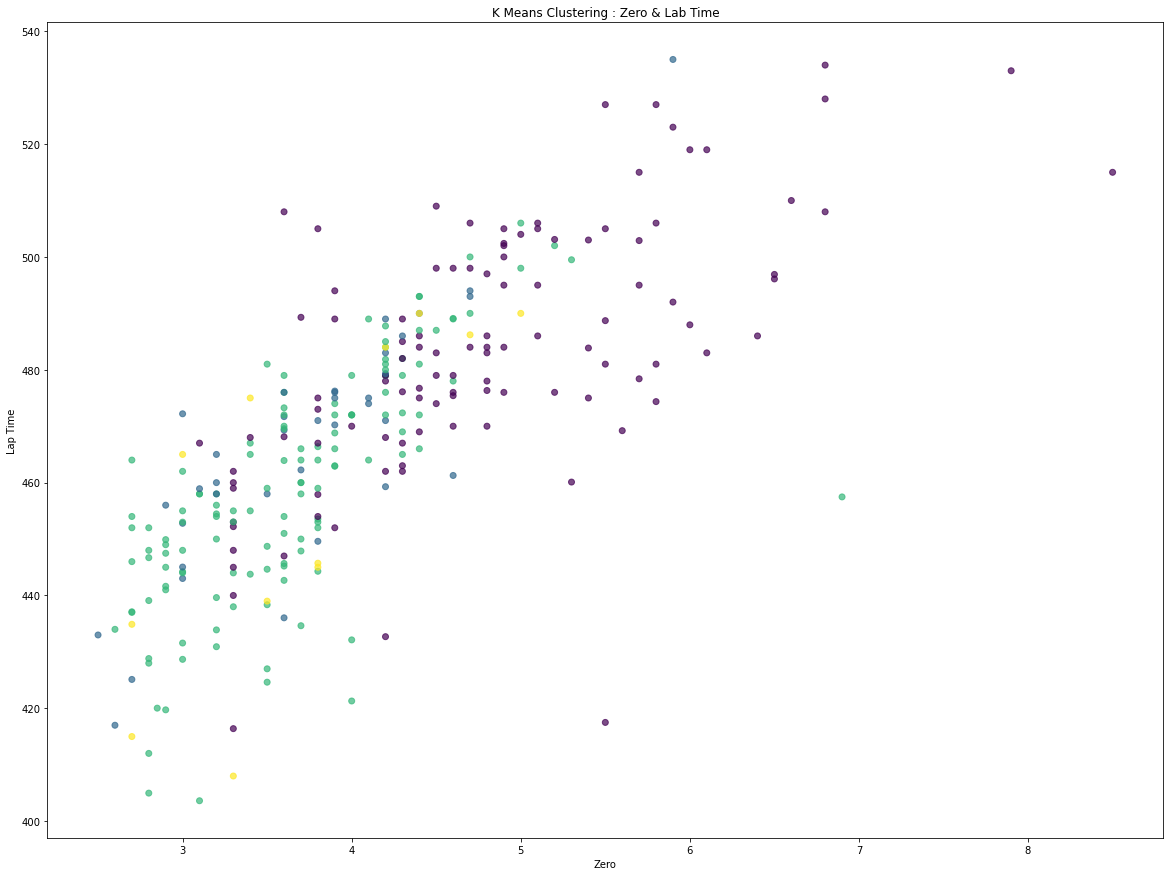

In [80]:
plt.figure(figsize = (20, 15))
plt.scatter(X.Zero, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Zero & Lab Time')
plt.xlabel("Zero")
plt.ylabel("Lap Time")
plt.show()

In [81]:
X.Zero

0      3.1
1      2.8
2      3.3
3      2.8
4      2.7
      ... 
283    5.5
284    6.8
285    7.9
286    6.8
287    5.9
Name: Zero, Length: 288, dtype: float64

# 선형회귀 수정

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import load_boston
%matplotlib inline

In [83]:
Y_data = df["laptime"].values # laptime 데이터
Y_data = (Y_data-Y_data.mean())*100 # 랩타임 데이터와 랩타임 평균과의 차이
X_data = df[["CurbWeight","Displacement","TopSpeed", "Power","Torque", "Zero"]].values # 자동차 인자별로 특성 모은 데이터
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1234)

In [84]:
X_data

array([[1.626e+03, 4.000e+00, 3.250e+02, 7.300e+02, 8.000e+02, 3.100e+00],
       [1.525e+03, 6.500e+00, 3.540e+02, 7.700e+02, 7.200e+02, 2.800e+00],
       [6.500e+02, 2.800e+00, 2.900e+02, 4.550e+02, 3.800e+02, 3.300e+00],
       ...,
       [1.372e+03, 2.000e+00, 2.350e+02, 2.000e+02, 2.800e+02, 7.900e+00],
       [1.293e+03, 1.600e+00, 2.300e+02, 2.070e+02, 2.800e+02, 6.800e+00],
       [2.589e+03, 5.000e+00, 2.250e+02, 5.170e+02, 6.250e+02, 5.900e+00]])

In [85]:
header = ["CurbWeight","Displacement","TopSpeed", "Power","Torque", "laptime", "Zero"]

In [86]:
# 함수에 집어넣기위해 양식 맞춰줌
Y_data = Y_data.reshape(-1, 1)
Y_data

array([[-6552.11458333],
       [-6417.11458333],
       [-6114.11458333],
       [-5713.11458333],
       [-5414.11458333],
       [-5274.11458333],
       [-5214.11458333],
       [-5164.11458333],
       [-4941.11458333],
       [-4911.11458333],
       [-4784.11458333],
       [-4451.11458333],
       [-4402.11458333],
       [-4214.11458333],
       [-4114.11458333],
       [-4046.11458333],
       [-4032.11458333],
       [-3822.11458333],
       [-3757.11458333],
       [-3701.11458333],
       [-3644.11458333],
       [-3614.11458333],
       [-3524.11458333],
       [-3514.11458333],
       [-3450.11458333],
       [-3425.11458333],
       [-3310.11458333],
       [-3214.11458333],
       [-3203.11458333],
       [-3114.11458333],
       [-3078.11458333],
       [-3014.11458333],
       [-3004.11458333],
       [-2951.11458333],
       [-2914.11458333],
       [-2814.11458333],
       [-2751.11458333],
       [-2646.11458333],
       [-2613.11458333],
       [-2537.11458333],


In [87]:
df = pd.DataFrame(np.append(X_data, Y_data, axis = 1))
df.columns = header

In [88]:
df

,CurbWeight,Displacement,TopSpeed,Power,Torque,laptime,Zero
0,1626.0,4.0,325.0,730.0,800.0,3.1,-6552.114583
1,1525.0,6.5,354.0,770.0,720.0,2.8,-6417.114583
2,650.0,2.8,290.0,455.0,380.0,3.3,-6114.114583
3,1526.0,5.2,328.0,640.0,600.0,2.8,-5713.114583
4,650.0,2.6,270.0,363.0,271.0,2.7,-5414.114583
...,...,...,...,...,...,...,...
283,1319.0,2.0,235.0,200.0,269.0,5.5,5785.885417
284,1203.0,1.6,223.0,194.0,230.0,6.8,5885.885417
285,1372.0,2.0,235.0,200.0,280.0,7.9,6385.885417
286,1293.0,1.6,230.0,207.0,280.0,6.8,6485.885417


#### 자동차의 각 인자 중 laptime에 확실히 기여하는 것을 확인하기 위해
#### statsmodel 라이브러리를 사용하여 분석

In [102]:
# laptime 과 차량의 모든 인자를 집어넣고 분석
# 결과에서는 P(유의수준)이 t (보통 0.05) 보다 큰 경우 상관도가 낮은 인자로 판단함
# 아래 결과에서는 CurbWeight와 Displacement가 상관도가 낮은거로 판단됨

myModel1 = smf.ols(formula = "laptime ~ CurbWeight + Displacement + TopSpeed + Displacement + Torque + Zero", data=df)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                laptime   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     108.8
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.04e-63
Time:                        02:22:06   Log-Likelihood:                -252.18
No. Observations:                 288   AIC:                             516.4
Df Residuals:                     282   BIC:                             538.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9902      0.414     16.901      0.000       6.176       7.804
CurbWeight    3.441e-05      0.000      0.217      0.828      -0.000       0.000
Displacement     0.0337      0.031      1.081      0.281      -0.028       0.095
TopSpeed        -0.0085      0.001     -5.749      0.000      -0.011      -0.006
Torque          -0.0010      0.000     -3.454      0.001      -0.002      -0.000
Zero             0.0002   2.08e-05      8.975      0.000       0.000       0.000
==============================================================================
Omnibus:                       86.953   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.756
Skew:                           1.266   Prob(JB):                     1.48e-67
Kurtosis:                       7.386   Cond. No.                     2.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# Displacement의 유의확률 P가 유의수준 0.05를 초과하나, 해당 계수를 제외할지는 추후 결정
myModel2 = smf.ols(formula = "laptime ~ Displacement + TopSpeed + Displacement + Torque + Zero", data=df)
result2 = myModel2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                laptime   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           8.52e-65
Time:                        01:37:53   Log-Likelihood:                -252.20
No. Observations:                 288   AIC:                             514.4
Df Residuals:                     283   BIC:                             532.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.0195      0.390     17.980      0.000       6.251       7.788
Displacement     0.0352      0.030      1.158      0.248      -0.025       0.095
TopSpeed        -0.0085      0.001     -5.762      0.000      -0.011      -0.006
Torque          -0.0010      0.000     -3.893      0.000      -0.001      -0.000
Zero             0.0002   1.92e-05      9.792      0.000       0.000       0.000
==============================================================================
Omnibus:                       86.712   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.869
Skew:                           1.260   Prob(JB):                     8.51e-68
Kurtosis:                       7.404   Cond. No.                     2.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
myDict = {"변수":[], "VIF":[]}
for i, feature in enumerate(myModel2.exog_names):
    if feature != "Intercept":
        myDict["변수"] += [feature]
        myDict["VIF"] += [variance_inflation_factor(myModel2.exog, i)]
pd.DataFrame(myDict)

,변수,VIF
0,Displacement,1.659048
1,TopSpeed,2.302648
2,Torque,1.946839
3,Zero,1.912517


### Statsmodel 결과 반영하여 재군집화 (필요없는 내용임)

In [92]:
# 우선 CurbWeight만 제거해본다
X_new = X.drop(columns = 'CurbWeight')
X_new

,TopSpeed,Displacement,Power,Torque,Zero
0,325.0,4.0,730.0,800.0,3.1
1,354.0,6.5,770.0,720.0,2.8
2,290.0,2.8,455.0,380.0,3.3
3,328.0,5.2,640.0,600.0,2.8
4,270.0,2.6,363.0,271.0,2.7
...,...,...,...,...,...
283,235.0,2.0,200.0,269.0,5.5
284,223.0,1.6,194.0,230.0,6.8
285,235.0,2.0,200.0,280.0,7.9
286,230.0,1.6,207.0,280.0,6.8


In [93]:
header_x_new = X_new.columns
header_x_new

Index(['TopSpeed', 'Displacement', 'Power', 'Torque', 'Zero'], dtype='object')

In [94]:
a = list(list(X_new.loc[i]) for i in range(len(X_new.index)))
b = np.array(a)
b

array([[325. ,   4. , 730. , 800. ,   3.1],
       [354. ,   6.5, 770. , 720. ,   2.8],
       [290. ,   2.8, 455. , 380. ,   3.3],
       ...,
       [235. ,   2. , 200. , 280. ,   7.9],
       [230. ,   1.6, 207. , 280. ,   6.8],
       [225. ,   5. , 517. , 625. ,   5.9]])

In [95]:
num_cluster = [2,3,4,5,6,7,8,9,10]
TIS_array = []
for i in num_cluster:
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(b)
    a = total_internal_ss(b, kmeans.cluster_centers_, kmeans.labels_)
    TIS_array.append(a)

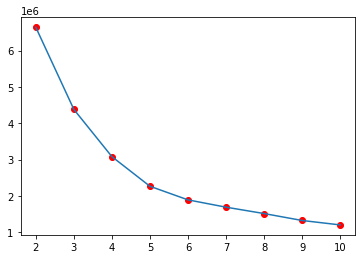

In [96]:
plt.scatter(num_cluster, TIS_array, color = 'red')
plt.plot(num_cluster, TIS_array)
plt.show()

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

In [98]:
# Dataset #1.
#X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)

plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

NameError: name 'X1' is not defined

### Displacement도 제거 (필요없는 내용)

In [132]:
# 우선 CurbWeight만 제거해본다
X_new2 = X.drop(columns = 'Displacement')
X_new2

,CurbWeight,TopSpeed,Power,Torque,Zero
0,1626,325.0,730,800,3.1
1,1525,354.0,770,720,2.8
2,650,290.0,455,380,3.3
3,1526,328.0,640,600,2.8
4,650,270.0,363,271,2.7
...,...,...,...,...,...
283,1319,235.0,200,269,5.5
284,1203,223.0,194,230,6.8
285,1372,235.0,200,280,7.9
286,1293,230.0,207,280,6.8


In [134]:
header_x_new2 = X_new2.columns
header_x_new2

Index(['CurbWeight', 'TopSpeed', 'Power', 'Torque', 'Zero'], dtype='object')

In [135]:
a = list(list(X_new.loc[i]) for i in range(len(X_new.index)))
b = np.array(a)
b

array([[325. ,   4. , 730. , 800. ,   3.1],
       [354. ,   6.5, 770. , 720. ,   2.8],
       [290. ,   2.8, 455. , 380. ,   3.3],
       ...,
       [235. ,   2. , 200. , 280. ,   7.9],
       [230. ,   1.6, 207. , 280. ,   6.8],
       [225. ,   5. , 517. , 625. ,   5.9]])

In [136]:
num_cluster = [2,3,4,5,6,7,8,9,10]
TIS_array = []
for i in num_cluster:
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(b)
    a = total_internal_ss(b, kmeans.cluster_centers_, kmeans.labels_)
    TIS_array.append(a)

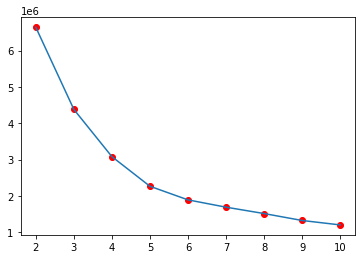

In [137]:
plt.scatter(num_cluster, TIS_array, color = 'red')
plt.plot(num_cluster, TIS_array)
plt.show()

'C:\\Users\\hyuk\\Documents\\멋쟁이 사자처럼\\팀프로젝트\\3rd\\새 폴더'